In [ ]:
import numpy as np
import os
import random
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from keras.utils import np_utils
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import time

print(tf.__version__)

2.8.0


In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from keras.utils import np_utils
from keras.models import load_model
from tensorflow import keras
import keras
import time
from google.colab import files
from google.colab import drive
import csv
import re
print(tf.__version__)

2.8.0


In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path = '/content/drive/MyDrive/Stock_data/dataset/BPCL.csv'

#Dataset Prep

In [ ]:
df = pd.read_csv(path)
print(df.shape)

(5306, 15)


In [ ]:
df = pd.read_csv(path)
#df.to_csv('test_dataset.csv')
print(df.shape)

(5306, 15)


In [ ]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BPCL,EQ,381.20,405.00,407.00,393.05,397.75,399.25,399.32,8720,3.482029e+11,NaN,NaN,NaN
1,2000-01-04,BPCL,EQ,399.25,397.75,397.75,367.40,377.45,370.50,375.71,22820,8.573699e+11,NaN,NaN,NaN
2,2000-01-05,BPCL,EQ,370.50,350.00,385.00,350.00,360.10,359.95,359.96,152538,5.490785e+12,NaN,NaN,NaN
3,2000-01-06,BPCL,EQ,359.95,362.00,384.00,362.00,381.65,380.30,380.10,59554,2.263623e+12,NaN,NaN,NaN
4,2000-01-07,BPCL,EQ,380.30,369.00,390.00,366.00,381.50,379.85,378.33,43187,1.633890e+12,NaN,NaN,NaN


In [ ]:
df.to_csv('test_dataset.csv')

In [ ]:
df1 = pd.read_csv('test_dataset.csv')
df1.head()

,Unnamed: 0,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,0,2000-01-03,BPCL,EQ,381.20,405.00,407.00,393.05,397.75,399.25,399.32,8720,3.482029e+11,NaN,NaN,NaN
1,1,2000-01-04,BPCL,EQ,399.25,397.75,397.75,367.40,377.45,370.50,375.71,22820,8.573699e+11,NaN,NaN,NaN
2,2,2000-01-05,BPCL,EQ,370.50,350.00,385.00,350.00,360.10,359.95,359.96,152538,5.490785e+12,NaN,NaN,NaN
3,3,2000-01-06,BPCL,EQ,359.95,362.00,384.00,362.00,381.65,380.30,380.10,59554,2.263623e+12,NaN,NaN,NaN
4,4,2000-01-07,BPCL,EQ,380.30,369.00,390.00,366.00,381.50,379.85,378.33,43187,1.633890e+12,NaN,NaN,NaN


In [ ]:
df1.rename(columns={'Unnamed: 0':'time'}, inplace=True)

In [ ]:
df1.head()

,time,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,0,2000-01-03,BPCL,EQ,381.20,405.00,407.00,393.05,397.75,399.25,399.32,8720,3.482029e+11,NaN,NaN,NaN
1,1,2000-01-04,BPCL,EQ,399.25,397.75,397.75,367.40,377.45,370.50,375.71,22820,8.573699e+11,NaN,NaN,NaN
2,2,2000-01-05,BPCL,EQ,370.50,350.00,385.00,350.00,360.10,359.95,359.96,152538,5.490785e+12,NaN,NaN,NaN
3,3,2000-01-06,BPCL,EQ,359.95,362.00,384.00,362.00,381.65,380.30,380.10,59554,2.263623e+12,NaN,NaN,NaN
4,4,2000-01-07,BPCL,EQ,380.30,369.00,390.00,366.00,381.50,379.85,378.33,43187,1.633890e+12,NaN,NaN,NaN


before normalization


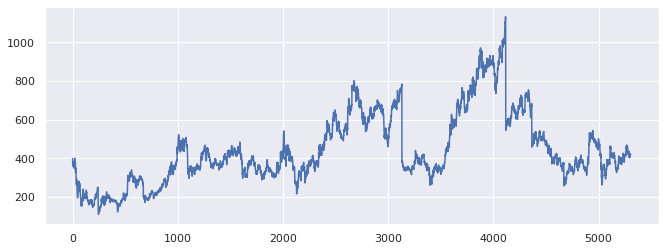

after normalization


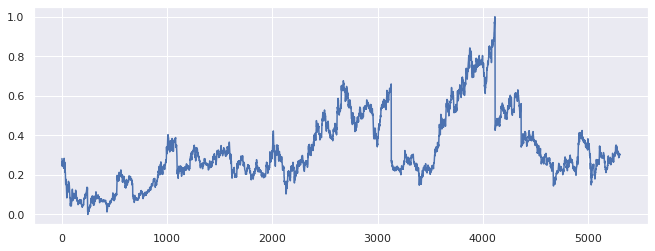

In [ ]:
prediction = 'Close'
time_step = 60
epochs = 50
loss_function = 'mean_squared_error'

df1=df.reset_index()[prediction]
sns.set(rc={'figure.figsize':(11, 4)})
print('before normalization')
plt.plot(df1)
plt.show()
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

print('after normalization')
plt.plot(df1)
plt.show()

#split training and test size
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)



In [ ]:

X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [ ]:
X_train.shape

(4183, 60)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
X_test.shape

(1001, 60, 1)

In [ ]:
def st(ips, name="sub_block1"):
  x = LSTM(64, return_sequences=True, activation='tanh')(ips)
  x = LSTM(64, activation='tanh')(x)
  #x = Dense(32, activation = "relu")(x)
  #x = Dense(1, activation = "relu")(x)
  return x

In [ ]:
def st2(ips, name="sub_block2"):
  x = GRU(64, return_sequences=True, activation='tanh')(ips)
  x = GRU(64, activation='tanh')(x)
  #x = Dense(32, activation = "relu")(x)
  #x = Dense(1, activation = "relu")(x)
  return x

In [ ]:
start = Input(shape= (None,1), name="input")
x = Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu")(start)
x1 = st(x)

x2 = st2(x)

x= layers.multiply([x1, x2])
#x= layers.concatenate([x1, x2])
x = Dense(32, activation = "relu")(x)
x = Dense(16, activation = "relu")(x)
end = Dense(1, name="output")(x)
final = Model(inputs=start, outputs=end)

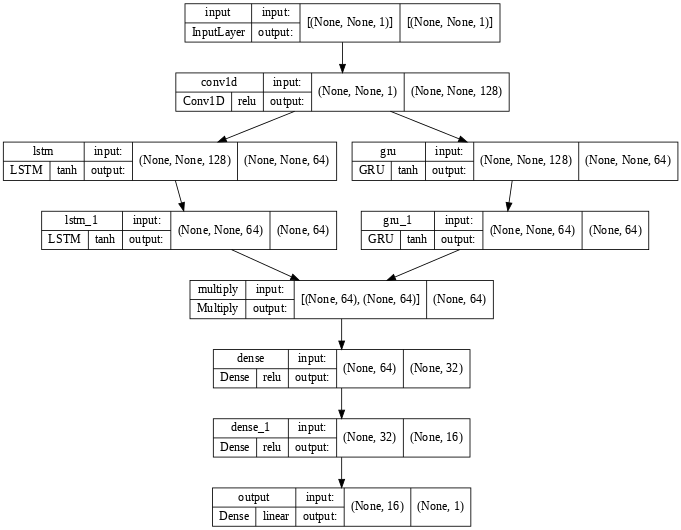

In [ ]:
keras.utils.plot_model(final, show_shapes = True, expand_nested=False, show_layer_activations=True, dpi=60)

In [ ]:
final.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, None, 1)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, None, 128)    768         ['input[0][0]']                  
                                                                                                  
 lstm (LSTM)                    (None, None, 64)     49408       ['conv1d[0][0]']                 
                                                                                                  
 gru (GRU)                      (None, None, 64)     37248       ['conv1d[0][0]']                 
                                                                                              

#Model Train

In [ ]:
from keras import callbacks
final.compile(loss=loss_function,optimizer='adam')

filepath="model_update.h5"
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss',save_best_only=True, mode='min',verbose=1)
callbacks_list = [checkpoint]

print('Training started ... ...')
t1 = time.time()
history = final.fit(X_train,y_train,validation_data=(X_test,ytest), epochs=epochs, batch_size=64, verbose=1, callbacks=callbacks_list)

print('-  -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -')
t2 = time.time()
print('Training Time: ', (t2-t1)/60.0, 'Minutes')

Training started ... ...
Epoch 1/50
66/66 [==============================] - ETA: 0s - loss: 0.0241
Epoch 1: val_loss improved from inf to 0.00058, saving model to model_update.h5
66/66 [==============================] - 24s 93ms/step - loss: 0.0241 - val_loss: 5.7912e-04
Epoch 2/50
66/66 [==============================] - ETA: 0s - loss: 7.9307e-04
Epoch 2: val_loss improved from 0.00058 to 0.00056, saving model to model_update.h5
66/66 [==============================] - 4s 64ms/step - loss: 7.9307e-04 - val_loss: 5.6357e-04
Epoch 3/50
66/66 [==============================] - ETA: 0s - loss: 6.4850e-04
Epoch 3: val_loss improved from 0.00056 to 0.00037, saving model to model_update.h5
66/66 [==============================] - 4s 65ms/step - loss: 6.4850e-04 - val_loss: 3.7488e-04
Epoch 4/50
66/66 [==============================] - ETA: 0s - loss: 5.5647e-04
Epoch 4: val_loss did not improve from 0.00037
66/66 [==============================] - 4s 65ms/step - loss: 5.5647e-04 - val_loss

# analysis

In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df.to_csv('mse_loss.csv', index = False)

In [ ]:
final.load_weights("model_update.h5")

In [ ]:
test_predict=final.predict(X_test)

In [ ]:
ytest

array([0.60690026, 0.59971656, 0.60015638, ..., 0.30318135, 0.30039584,
       0.30239945])

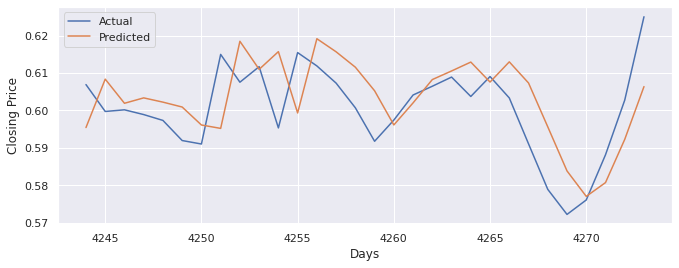

In [ ]:
time_ahead = 30
new_index = list(range(training_size, training_size+time_ahead))

df_p = {'x_val':list(new_index), 'y_val':list(test_predict[:time_ahead])}
df_t = {'x_val':list(new_index), 'y_val':list(ytest[:time_ahead])}

df_p = pd.DataFrame(df_p)
df_t = pd.DataFrame(df_t)
df_p['y_val'] = df_p['y_val'].str.get(0)
new_df = {'TimeActual': df_t['x_val'], 'PriceActual': df_t['y_val'], 'TimePredicted': df_p['x_val'], 'PricePredicted': df_p['y_val'] }
new_data= pd.DataFrame(new_df)
new_data.to_csv(f'Future_{time_ahead}_days_data.csv', index = False)

plt.plot(df_t['x_val'], df_t['y_val'], label='Actual')
plt.plot(df_p['x_val'], df_p['y_val'], label='Predicted')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.savefig(f'Future_{time_ahead}_days_data.csv.png', bbox_inches ="tight", dpi = 720)
plt.show()

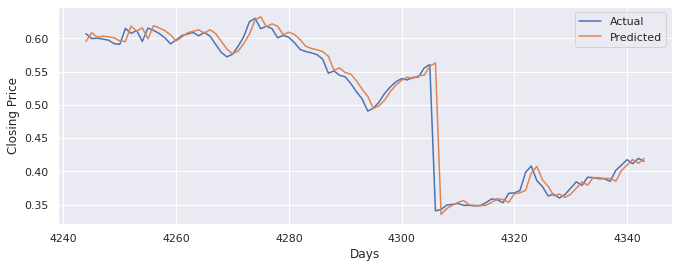

In [ ]:
time_ahead = 100
new_index = list(range(training_size, training_size+time_ahead))

df_p = {'x_val':list(new_index), 'y_val':list(test_predict[:time_ahead])}
df_t = {'x_val':list(new_index), 'y_val':list(ytest[:time_ahead])}

df_p = pd.DataFrame(df_p)
df_t = pd.DataFrame(df_t)
df_p['y_val'] = df_p['y_val'].str.get(0)
new_df = {'TimeActual': df_t['x_val'], 'PriceActual': df_t['y_val'], 'TimePredicted': df_p['x_val'], 'PricePredicted': df_p['y_val'] }
new_data= pd.DataFrame(new_df)
new_data.to_csv(f'Future_{time_ahead}_days_data.csv', index = False)

plt.plot(df_t['x_val'], df_t['y_val'], label='Actual')
plt.plot(df_p['x_val'], df_p['y_val'], label='Predicted')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.savefig(f'Future_{time_ahead}_days_data.csv.png', bbox_inches ="tight", dpi = 720)
plt.show()

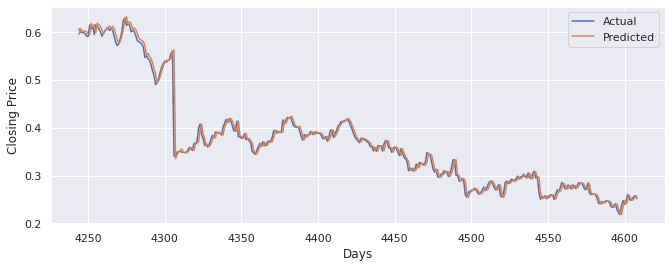

In [ ]:
time_ahead = 365
new_index = list(range(training_size, training_size+time_ahead))

df_p = {'x_val':list(new_index), 'y_val':list(test_predict[:time_ahead])}
df_t = {'x_val':list(new_index), 'y_val':list(ytest[:time_ahead])}

df_p = pd.DataFrame(df_p)
df_t = pd.DataFrame(df_t)
df_p['y_val'] = df_p['y_val'].str.get(0)
new_df = {'TimeActual': df_t['x_val'], 'PriceActual': df_t['y_val'], 'TimePredicted': df_p['x_val'], 'PricePredicted': df_p['y_val'] }
new_data= pd.DataFrame(new_df)
new_data.to_csv(f'Future_{time_ahead}_days_data.csv', index = False)

plt.plot(df_t['x_val'], df_t['y_val'], label='Actual')
plt.plot(df_p['x_val'], df_p['y_val'], label='Predicted')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.savefig(f'Future_{time_ahead}_days_data.csv.png', bbox_inches ="tight", dpi = 720)
plt.show()

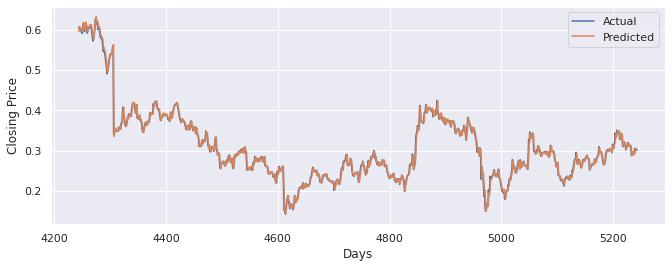

In [ ]:
time_ahead = 1000
new_index = list(range(training_size, training_size+time_ahead))

df_p = {'x_val':list(new_index), 'y_val':list(test_predict[:time_ahead])}
df_t = {'x_val':list(new_index), 'y_val':list(ytest[:time_ahead])}

df_p = pd.DataFrame(df_p)
df_t = pd.DataFrame(df_t)
df_p['y_val'] = df_p['y_val'].str.get(0)
new_df = {'TimeActual': df_t['x_val'], 'PriceActual': df_t['y_val'], 'TimePredicted': df_p['x_val'], 'PricePredicted': df_p['y_val'] }
new_data= pd.DataFrame(new_df)
new_data.to_csv(f'Future_{time_ahead}_days_data.csv', index = False)

plt.plot(df_t['x_val'], df_t['y_val'], label='Actual')
plt.plot(df_p['x_val'], df_p['y_val'], label='Predicted')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.savefig(f'Future_{time_ahead}_days_data.csv.png', bbox_inches ="tight", dpi = 720)
plt.show()

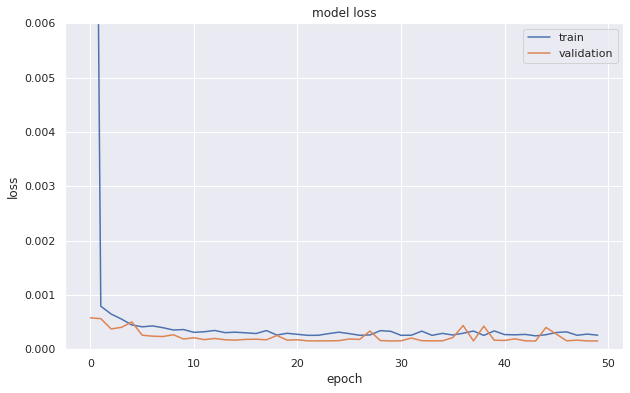

In [ ]:
plt.figure(figsize=(10, 6))
plt.ylim(0.0,0.006 )
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.savefig('train_valide_loss_main.png')
plt.show()

#CDF
#RMSE

In [ ]:
train_predict=final.predict(X_train)

In [ ]:
import math
from sklearn.metrics import mean_squared_error


a = math.sqrt(mean_squared_error(y_train,train_predict))
print('train_error',a)



train_error 0.015149477445049386


In [ ]:
all = math.sqrt(mean_squared_error(ytest,test_predict))
print(X_test.shape)
print(test_predict.shape)
print('test_error',all)

(1001, 60, 1)
(1001, 1)
test_error 0.012329169775927101


In [ ]:
error_val = []
m_val = []
m = 200
for i in range(test_predict.shape[0]):
  if m<test_predict.shape[0]:
    m_val.append(m)
    val = math.sqrt(mean_squared_error(ytest[:m],test_predict[:m]))
    error_val.append(val)
    m = m +200
m_val.append(test_predict.shape[0])
error_val.append(all)

In [ ]:
new_val = {'Test set split':m_val, 'error':error_val}
error_test = pd.DataFrame(new_val)
error_test

,Test set split,error
0,200,0.018253
1,400,0.014878
2,600,0.012972
3,800,0.012961
4,1000,0.012335
5,1001,0.012329


In [ ]:
error_test.to_csv('rmse_test_split_error.csv', index = False)

In [ ]:
error_list = []
window_size = 20
i1 = 0
for i in range(X_test.shape[0]):
  i2 = i1 + window_size
  if i1<X_test.shape[0] and i2<X_test.shape[0]:
    cdf_predict=final.predict(X_test[i1:i2])
    val = math.sqrt(mean_squared_error(ytest[i1:i2],cdf_predict))
    error_list.append(val)
    i1 = i2

error_list = sorted(error_list)

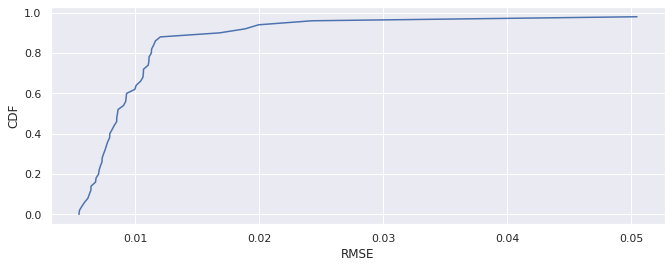

In [ ]:
x = np.sort(error_list)
y = np.arange(len(x))/float(len(x))

plt.plot(x, y, label='test')
plt.ylabel('CDF')
plt.xlabel('RMSE')
plt.savefig('rmse_error_cdf.png')
plt.show()

In [ ]:
error_name = 'root_mean_squared_error'

In [ ]:
data = {error_name: error_list, 'cdf':y}
cdf1 = pd.DataFrame(data)
cdf1.head()

,root_mean_squared_error,cdf
0,0.005444,0.00
1,0.005483,0.02
2,0.005676,0.04
3,0.005893,0.06
4,0.006161,0.08


In [ ]:
cdf1.to_csv('rmse_error_cdf.csv', index = False)

#MAPE

In [ ]:
def Mean_Absolute_Percentage_Error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(((y_true - y_pred)) / (y_true))) * 100

In [ ]:
error_name = 'mean_absolute_percentage_error'

In [ ]:
x =  (Mean_Absolute_Percentage_Error(y_train,train_predict))
print('train_error',x)

train_error inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
all = (Mean_Absolute_Percentage_Error(ytest,test_predict))
print(all)

31.861678788333652


In [ ]:
error_val = []
m_val = []
m = 200
for i in range(test_predict.shape[0]):
  if m<test_predict.shape[0]:
    m_val.append(m)
    val = (Mean_Absolute_Percentage_Error(ytest[:m],test_predict[:m]))
    error_val.append(val)
    m = m +200
m_val.append(test_predict.shape[0])
error_val.append(all)

new_val = {'Test set split':m_val, error_name:error_val}
error_test = pd.DataFrame(new_val)

error_test.to_csv('mape_test_split_error.csv', index = False)

In [ ]:
error_list = []
window_size = 20
i1 = 0
for i in range(X_test.shape[0]):
  i2 = i1+window_size
  if i1<X_test.shape[0] and i2<X_test.shape[0]:
    cdf_predict=final.predict(X_test[i1:i2])
    val = (Mean_Absolute_Percentage_Error(ytest[i1:i2],cdf_predict))
    error_list.append(val)
    i1 = i2

error_list = sorted(error_list)

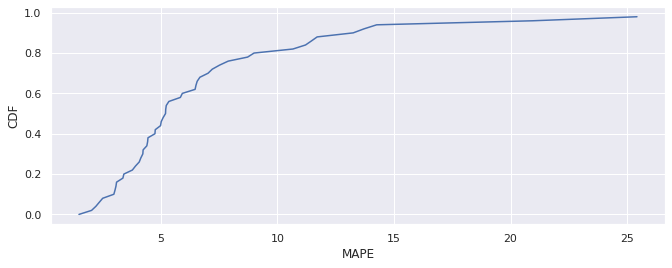

In [ ]:
x = np.sort(error_list)
y = np.arange(len(x))/float(len(x))
plt.plot(x, y)
plt.ylabel('CDF')
plt.xlabel('MAPE')
plt.savefig('mape_error_cdf.png', bbox_inches ="tight", dpi = 720)
plt.show()

In [ ]:
data1 = {error_name:x, 'cdf':y}
cdf1 = pd.DataFrame(data1)
cdf1.to_csv('rmse_error_cdf.csv', index = False)

#MSLE

In [ ]:
from sklearn.metrics import mean_squared_log_error
x = (mean_squared_log_error(y_train,train_predict))
print('train_error',x)
x = (mean_squared_log_error(ytest,test_predict))
print('test_error',x)

train_error 0.00010723360444353648
test_error 8.460443076823203e-05


#R2-Score

In [ ]:
from sklearn.metrics import r2_score
error_name = 'r2_score'

In [ ]:
x = (r2_score(y_train,train_predict))
print('train_error',x)

train_error 0.993965242978392


In [ ]:
all = (r2_score(ytest,test_predict))
print(all)

0.982142248368125


In [ ]:
error_val = []
m_val = []
m = 200
for i in range(test_predict.shape[0]):
  if m<test_predict.shape[0]:
    m_val.append(m)
    val = (r2_score(ytest[:m],test_predict[:m]))
    error_val.append(val)
    m = m +200
m_val.append(test_predict.shape[0])
error_val.append(all)

new_val = {'Test set split':m_val, error_name:error_val}
error_test = pd.DataFrame(new_val)

error_test.to_csv('R2_test_split_error.csv', index = False)

In [ ]:
error_list = []
window_size = 20
i1 = 0
for i in range(X_test.shape[0]):
  i2 = i1+window_size
  if i1<X_test.shape[0] and i2<X_test.shape[0]:
    cdf_predict=final.predict(X_test[i1:i2])
    val = (r2_score(ytest[i1:i2],cdf_predict))
    error_list.append(val)
    i1 = i2

error_list = sorted(error_list)

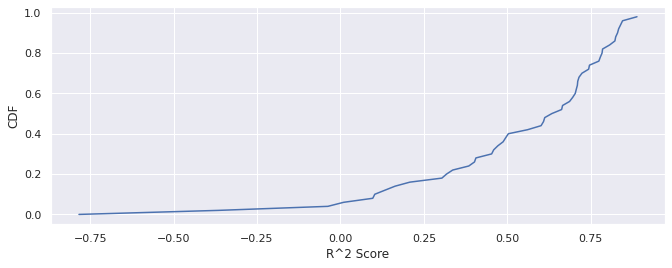

In [ ]:
x = np.sort(error_list)
y = np.arange(len(x))/float(len(x))
plt.plot(x, y)
plt.ylabel('CDF')
plt.xlabel('R^2 Score')
plt.savefig('r2_error_cdf.png', bbox_inches ="tight", dpi = 720)
plt.show()

In [ ]:
data1 = {error_name:x, 'cdf':y}
cdf1 = pd.DataFrame(data1)
cdf1.to_csv('r2_error_cdf.csv', index = False)

#BiLSTM

In [ ]:
st = Input(shape= (None,1), name="input")
x = Bidirectional(LSTM(64, return_sequences=True, activation = "tanh"))(st)
x = Bidirectional(LSTM(64, activation = "tanh"))(x)
x = Dense(32, activation = "relu")(x)
x = Dense(16, activation = "relu")(x)
end = Dense(1)(x)
final_lstm = Model(inputs=st, outputs=end)

In [ ]:
final_lstm.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, None, 1)]         0         
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        33792     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17  

In [ ]:
final_lstm.compile(loss=loss_function,optimizer='adam')
filepath="model_update_lstm.h5"
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss',save_best_only=True, mode='min',verbose=1)
callbacks_list = [checkpoint]

print('Training started ... ...')
t1 = time.time()
history_lstm = final_lstm.fit(X_train,y_train,validation_data=(X_test,ytest), epochs=epochs, batch_size=64, verbose=1, callbacks=callbacks_list)

print('-  -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -')
t2 = time.time()
print('Training Time: ', (t2-t1)/60.0, 'Minutes')


Training started ... ...
Epoch 1/50
66/66 [==============================] - ETA: 0s - loss: 0.0148
Epoch 1: val_loss improved from inf to 0.00132, saving model to model_update_lstm.h5
66/66 [==============================] - 14s 96ms/step - loss: 0.0148 - val_loss: 0.0013
Epoch 2/50
66/66 [==============================] - ETA: 0s - loss: 0.0016
Epoch 2: val_loss improved from 0.00132 to 0.00099, saving model to model_update_lstm.h5
66/66 [==============================] - 5s 69ms/step - loss: 0.0016 - val_loss: 9.9293e-04
Epoch 3/50
66/66 [==============================] - ETA: 0s - loss: 0.0011
Epoch 3: val_loss improved from 0.00099 to 0.00080, saving model to model_update_lstm.h5
66/66 [==============================] - 5s 69ms/step - loss: 0.0011 - val_loss: 7.9989e-04
Epoch 4/50
66/66 [==============================] - ETA: 0s - loss: 9.7079e-04
Epoch 4: val_loss improved from 0.00080 to 0.00051, saving model to model_update_lstm.h5
66/66 [==============================] - 5s 68

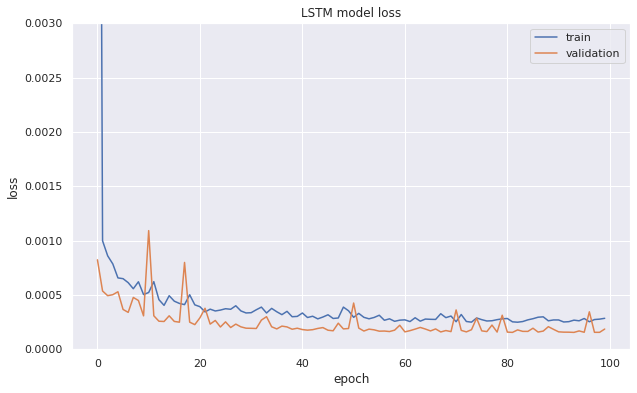

In [ ]:
plt.figure(figsize=(10, 6))
plt.ylim(0.0,0.003 )
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

#analysis LSTM

In [ ]:
hist_df_ls = pd.DataFrame(history_lstm.history)
hist_df_ls.to_csv('mse_lstm_loss.csv', index = False)

In [ ]:
final_lstm.load_weights("model_update_lstm.h5")

In [ ]:
test_predict_ls=final_lstm.predict(X_test)

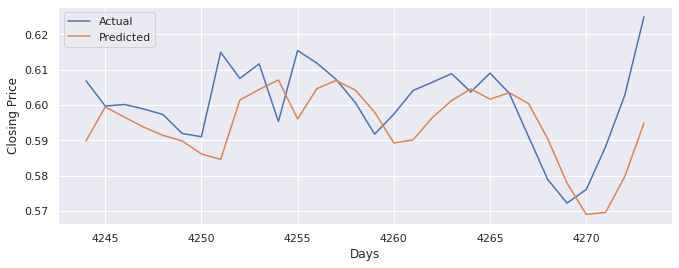

In [ ]:
time_ahead = 30
new_index = list(range(training_size, training_size+time_ahead))

df_p = {'x_val':list(new_index), 'y_val':list(test_predict_ls[:time_ahead])}
df_t = {'x_val':list(new_index), 'y_val':list(ytest[:time_ahead])}

df_p = pd.DataFrame(df_p)
df_t = pd.DataFrame(df_t)
df_p['y_val'] = df_p['y_val'].str.get(0)
new_df = {'TimeActual': df_t['x_val'], 'PriceActual': df_t['y_val'], 'TimePredicted': df_p['x_val'], 'PricePredicted': df_p['y_val'] }
new_data= pd.DataFrame(new_df)
new_data.to_csv(f'Future_{time_ahead}_days_data_lstm.csv', index = False)

plt.plot(df_t['x_val'], df_t['y_val'], label='Actual')
plt.plot(df_p['x_val'], df_p['y_val'], label='Predicted')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.savefig(f'Future_{time_ahead}_days_data_lstm.png', bbox_inches ="tight", dpi = 720)
plt.show()

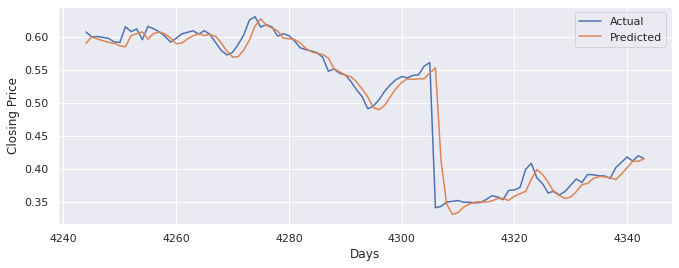

In [ ]:
time_ahead = 100
new_index = list(range(training_size, training_size+time_ahead))

df_p = {'x_val':list(new_index), 'y_val':list(test_predict_ls[:time_ahead])}
df_t = {'x_val':list(new_index), 'y_val':list(ytest[:time_ahead])}

df_p = pd.DataFrame(df_p)
df_t = pd.DataFrame(df_t)
df_p['y_val'] = df_p['y_val'].str.get(0)
new_df = {'TimeActual': df_t['x_val'], 'PriceActual': df_t['y_val'], 'TimePredicted': df_p['x_val'], 'PricePredicted': df_p['y_val'] }
new_data= pd.DataFrame(new_df)
new_data.to_csv(f'Future_{time_ahead}_days_data_lstm.csv', index = False)

plt.plot(df_t['x_val'], df_t['y_val'], label='Actual')
plt.plot(df_p['x_val'], df_p['y_val'], label='Predicted')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.savefig(f'Future_{time_ahead}_days_data_lstm.png', bbox_inches ="tight", dpi = 720)
plt.show()

#LSTM CDF

In [ ]:
train_predict_ls=final_lstm.predict(X_train)

In [ ]:
import math
from sklearn.metrics import mean_squared_error


a_l = math.sqrt(mean_squared_error(y_train,train_predict_ls))
print('train_error_lstm',a_l)

train_error_lstm 0.016271098754598704


In [ ]:
all_l = math.sqrt(mean_squared_error(ytest,test_predict_ls))
print(X_test.shape)
print(test_predict_ls.shape)
print('test_error_lstm',all_l)

(1001, 60, 1)
(1001, 1)
test_error_lstm 0.013233456645250465


In [ ]:
x = (r2_score(y_train,train_predict_ls))
print('train_error',x)

train_error 0.9930385734555109


In [ ]:
x = (r2_score(ytest,test_predict_ls))
print('test_error',x)

test_error 0.979426617038421


In [ ]:
from sklearn.metrics import mean_squared_log_error
x = (mean_squared_log_error(y_train,train_predict_ls))
print('train_error',x)
x = (mean_squared_log_error(ytest,test_predict_ls))
print('test_error',x)

train_error 0.00012608599929187194
test_error 9.922443755945621e-05


In [ ]:
error_val1 = []
m_val1 = []
m = 200
for i in range(test_predict_ls.shape[0]):
  if m<test_predict_ls.shape[0]:
    m_val1.append(m)
    val = math.sqrt(mean_squared_error(ytest[:m],test_predict_ls[:m]))
    error_val1.append(val)
    m = m +200
m_val1.append(test_predict.shape[0])
error_val1.append(all)


In [ ]:
new_val1 = {'Test set split':m_val1, 'error':error_val1}
error_test1 = pd.DataFrame(new_val1)
error_test1

,Test set split,error
0,200,0.018846
1,400,0.015851
2,600,0.013907
3,800,0.013887
4,1000,0.013240
5,1001,0.982142


In [ ]:
error_test.to_csv('rmse_test_split_error_lstm.csv', index = False)

In [ ]:
error_list1 = []
window_size = 20
i1 = 0
for i in range(X_test.shape[0]):
  i2 = i1 + window_size
  if i1<X_test.shape[0] and i2<X_test.shape[0]:
    cdf_predict=final_lstm.predict(X_test[i1:i2])
    val = math.sqrt(mean_squared_error(ytest[i1:i2],cdf_predict))
    error_list1.append(val)
    i1 = i2

error_list1 = sorted(error_list1)

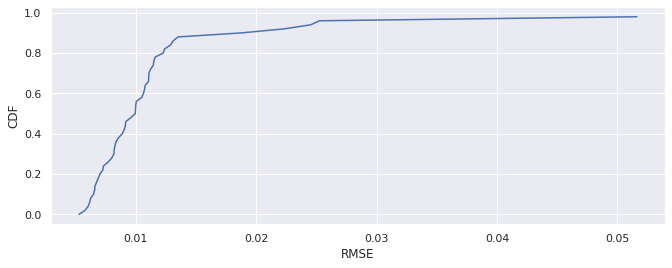

In [ ]:
x1 = np.sort(error_list1)
y1 = np.arange(len(x1))/float(len(x1))

plt.plot(x1, y1, label='test')
plt.ylabel('CDF')
plt.xlabel('RMSE')
plt.savefig('rmse_error_cdf_lstm.png')
plt.show()

In [ ]:
error_name = 'root_mean_squared_error'
data = {error_name: error_list, 'cdf':y}
cdf1 = pd.DataFrame(data)
cdf1.head()

,root_mean_squared_error,cdf
0,0.005444,0.00
1,0.005483,0.02
2,0.005676,0.04
3,0.005893,0.06
4,0.006161,0.08


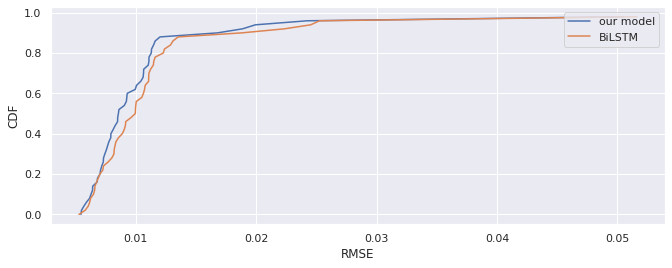

In [ ]:
plt.plot(x, y, label='our model')
plt.plot(x1, y1, label='BiLSTM')
plt.ylabel('CDF')
plt.xlabel('RMSE')
plt.legend(['our model', 'BiLSTM'], loc='upper right')
plt.savefig('rmse_error_cdf_all.png')
plt.show()